In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\jordan\Downloads\housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values

In [4]:
X = dataset[:,0:10]

In [5]:
Y = dataset[:,10]

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [11]:
# Model start

In [12]:
# Got alot of errors because they had wrong imports. This should fix it.
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 25ms/step - loss: 0.7102 - accuracy: 0.4844 - val_loss: 0.6996 - val_accuracy: 0.4977
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.4933 - val_loss: 0.6922 - val_accuracy: 0.4932
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5192 - val_loss: 0.6859 - val_accuracy: 0.6073
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.6702 - val_loss: 0.6802 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.7043 - val_loss: 0.6746 - val_accuracy: 0.7032
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.7282 - val_loss: 0.6685 - val_accuracy: 0.7306
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.7176 - val_loss: 0.6604 - val_accuracy: 0.7489
Epoch 8/100


In [15]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8950


0.8949771523475647

In [16]:
import matplotlib.pyplot as plt

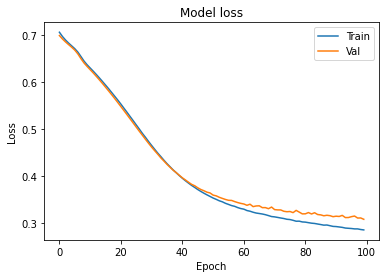

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

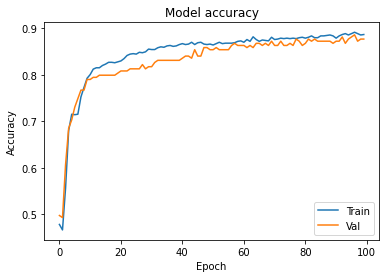

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [20]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.5135 - accuracy: 0.7121 - val_loss: 0.3707 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3072 - accuracy: 0.8814 - val_loss: 0.3446 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.8549 - val_loss: 0.3435 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8861 - val_loss: 0.3212 - val_accuracy: 0.8265
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.8594 - val_loss: 0.3024 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.8937 - val_loss: 0.3222 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.9047 - val_loss: 0.3088 - val_accuracy: 0.8950
Epoch 8/100
3

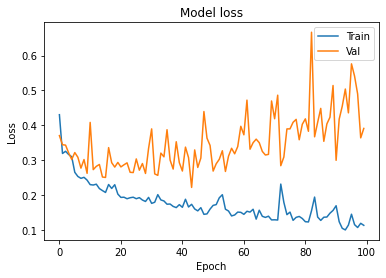

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

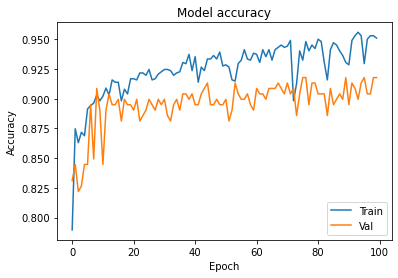

In [23]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [25]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [26]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 21.1195 - accuracy: 0.5519 - val_loss: 3.9110 - val_accuracy: 0.6849
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 2.4978 - accuracy: 0.8159 - val_loss: 0.6961 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5828 - accuracy: 0.8687 - val_loss: 0.5867 - val_accuracy: 0.8037
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5455 - accuracy: 0.8499 - val_loss: 0.5179 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5141 - accuracy: 0.8676 - val_loss: 0.4809 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4614 - accuracy: 0.8918 - val_loss: 0.5892 - val_accuracy: 0.8174
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4882 - accuracy: 0.8839 - val_loss: 0.4937 - val_accuracy: 0.8858
Epoch 8/100

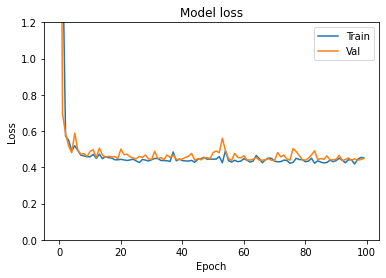

In [28]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

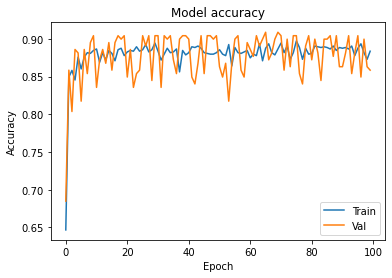

In [29]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
# This is where it ends but im gonna try the first model with added reg

In [44]:
model_4 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [45]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
hist_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 1.1711 - accuracy: 0.5082 - val_loss: 1.0615 - val_accuracy: 0.7306
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0429 - accuracy: 0.5861 - val_loss: 0.9646 - val_accuracy: 0.7626
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9542 - accuracy: 0.6419 - val_loss: 0.8841 - val_accuracy: 0.8037
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8755 - accuracy: 0.7288 - val_loss: 0.8162 - val_accuracy: 0.7945
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8087 - accuracy: 0.7652 - val_loss: 0.7591 - val_accuracy: 0.8082
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7642 - accuracy: 0.7504 - val_loss: 0.7087 - val_accuracy: 0.8128
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7137 - accuracy: 0.7631 - val_loss: 0.6640 - val_accuracy: 0.8082
Epoch 8/100


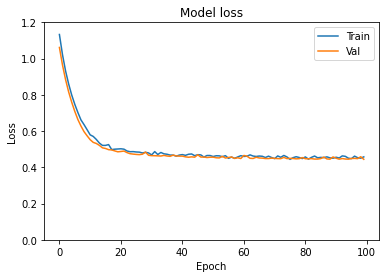

In [47]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

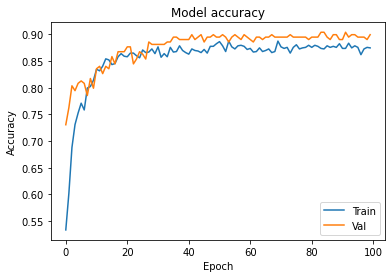

In [48]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [49]:
model_4.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8995


0.8995434045791626

In [37]:
# Wow look how much better they fit!!!

In [38]:
model_mse = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [39]:
model_mse.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [40]:
hist_mse = model_mse.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.7090 - accuracy: 0.5517 - val_loss: 0.6198 - val_accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.5471 - val_loss: 0.5239 - val_accuracy: 0.6849
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.6421 - val_loss: 0.4504 - val_accuracy: 0.7534
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.6895 - val_loss: 0.3945 - val_accuracy: 0.7991
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.7345 - val_loss: 0.3523 - val_accuracy: 0.8219
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.7255 - val_loss: 0.3204 - val_accuracy: 0.8219
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.7554 - val_loss: 0.2961 - val_accuracy: 0.8082
Epoch 8/100
3

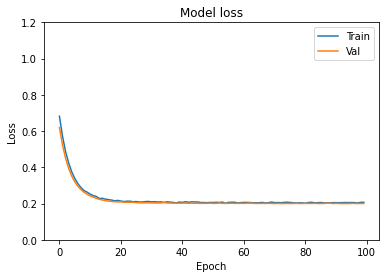

In [41]:
plt.plot(hist_mse.history['loss'])
plt.plot(hist_mse.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

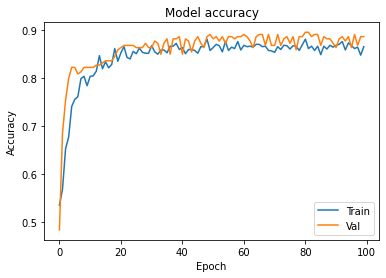

In [42]:
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [43]:
model_mse.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9041


0.9041095972061157

In [50]:
# How about Mean absolute error

In [53]:
model_mae = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [54]:
model_mae.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])

In [55]:
hist_mae = model_mae.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.9890 - accuracy: 0.4975 - val_loss: 0.8898 - val_accuracy: 0.4795
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8644 - accuracy: 0.5172 - val_loss: 0.7901 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7791 - accuracy: 0.5081 - val_loss: 0.7141 - val_accuracy: 0.4795
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5286 - val_loss: 0.6547 - val_accuracy: 0.4886
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.5263 - val_loss: 0.6063 - val_accuracy: 0.5479
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5936 - accuracy: 0.5987 - val_loss: 0.5676 - val_accuracy: 0.6164
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.6558 - val_loss: 0.5352 - val_accuracy: 0.7215
Epoch 8/100
3

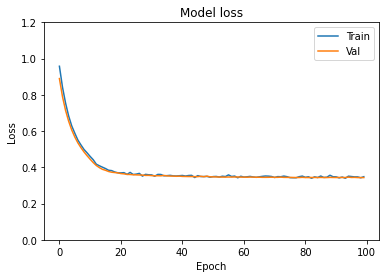

In [57]:
plt.plot(hist_mae.history['loss'])
plt.plot(hist_mae.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

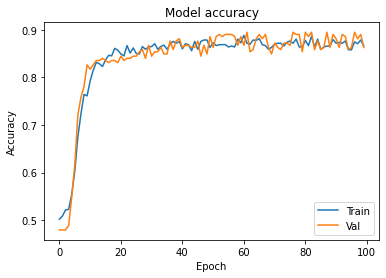

In [58]:
plt.plot(hist_mae.history['accuracy'])
plt.plot(hist_mae.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [59]:
model_mae.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.9041


0.9041095972061157

In [60]:
# And done. Seems adding that increases acc